In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import typing


# Load the datasets (replace the file paths with your actual paths)
train_x = pd.read_csv('train_x.csv', skiprows=1, header=None, names=['lon', 'lat', 'area_id'])
train_y = pd.read_csv('train_y.csv', skiprows=1, header=None, names=['pm25'])


In [3]:
train_x.head()

,lon,lat,area_id
0,0.85750,0.68625,1.0
1,0.41125,0.67500,1.0
2,0.86250,0.90625,1.0
3,0.81125,0.81000,0.0
4,0.46875,0.11625,0.0


In [4]:
train_y.head()

,pm25
0,36.203168
1,55.946348
2,12.042066
3,48.804589
4,11.136404


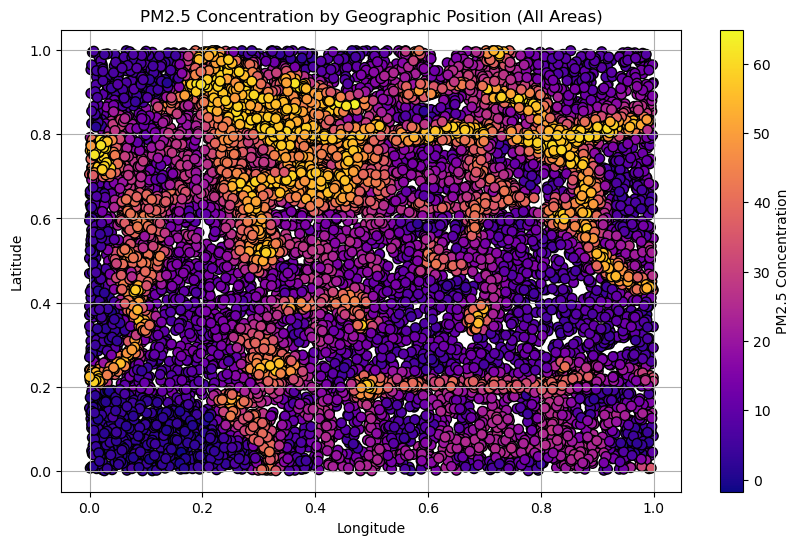

In [5]:
# Merge the datasets for better visualization
train_data = pd.concat([train_x, train_y], axis=1)

# Plot 1: PM2.5 concentration per geographic position (disregarding area_id)
plt.figure(figsize=(10, 6))
plt.scatter(train_data['lon'], train_data['lat'], c=train_data['pm25'], cmap='plasma', s=50, edgecolor='k')
plt.colorbar(label='PM2.5 Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PM2.5 Concentration by Geographic Position (All Areas)')
plt.grid(True)
plt.show()


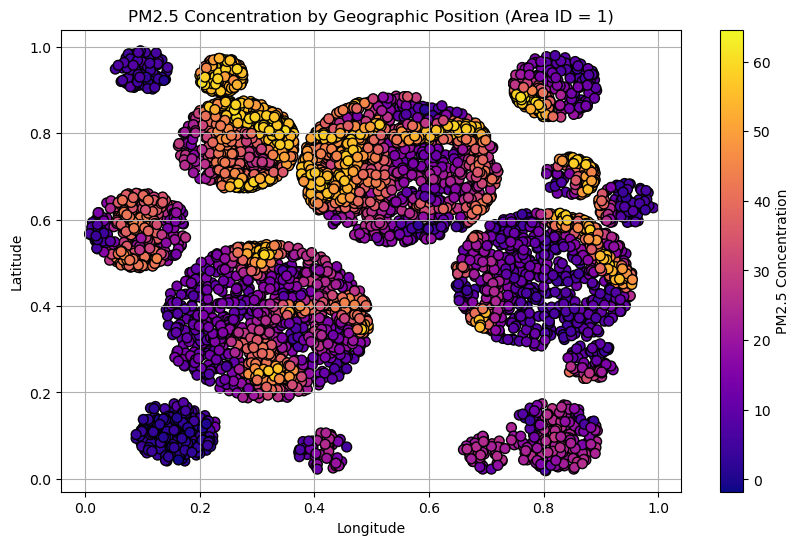

In [6]:
# Plot 2: PM2.5 concentration for area_id = 1
plt.figure(figsize=(10, 6))
area_1 = train_data[train_data['area_id'] == 1]
plt.scatter(area_1['lon'], area_1['lat'], c=area_1['pm25'], cmap='plasma', s=50, edgecolor='k')
plt.colorbar(label='PM2.5 Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PM2.5 Concentration by Geographic Position (Area ID = 1)')
plt.grid(True)
plt.show()

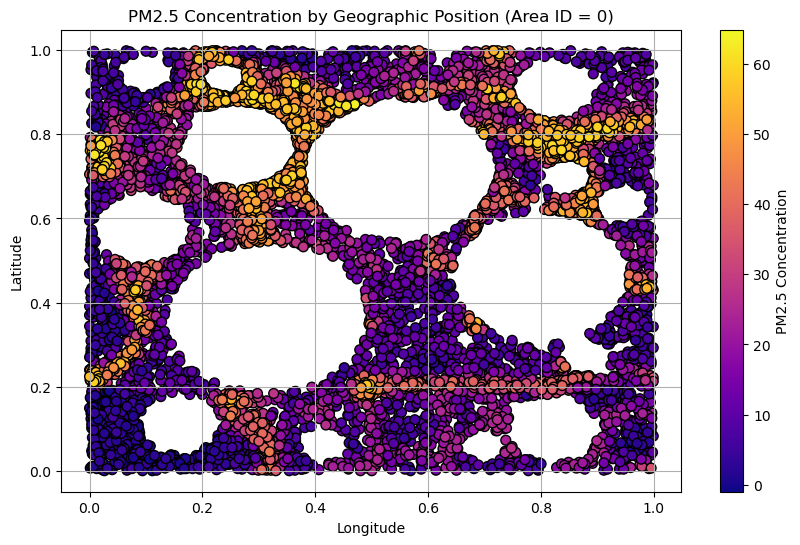

In [7]:
# Plot 3: PM2.5 concentration for area_id = 0
plt.figure(figsize=(10, 6))
area_0 = train_data[train_data['area_id'] == 0]
plt.scatter(area_0['lon'], area_0['lat'], c=area_0['pm25'], cmap='plasma', s=50, edgecolor='k')
plt.colorbar(label='PM2.5 Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PM2.5 Concentration by Geographic Position (Area ID = 0)')
plt.grid(True)
plt.show()

In [12]:
import numpy as np
def extract_area_information(train_x: np.ndarray, test_x: np.ndarray) -> typing.Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Extracts the city_area information from the training and test features.
    :param train_x: Training features
    :param test_x: Test features
    :return: Tuple of (training features' 2D coordinates, training features' city_area information,
        test features' 2D coordinates, test features' city_area information)
    """
    train_coordinates = train_x[:, :2]
    test_coordinates = test_x[:, :2]
    train_area_flags = train_x[:, 2].astype(bool)
    test_area_flags = test_x[:, 2].astype(bool)  

    #TODO: Extract the city_area information from the training and test features

    assert train_coordinates.shape[0] == train_area_flags.shape[0] and test_coordinates.shape[0] == test_area_flags.shape[0]
    assert train_coordinates.shape[1] == 2 and test_coordinates.shape[1] == 2
    assert train_area_flags.ndim == 1 and test_area_flags.ndim == 1

    return train_coordinates, train_area_flags, test_coordinates, test_area_flags

In [13]:
# Load the training dateset and test features
train_x = np.loadtxt('train_x.csv', delimiter=',', skiprows=1)
train_y = np.loadtxt('train_y.csv', delimiter=',', skiprows=1)
test_x = np.loadtxt('test_x.csv', delimiter=',', skiprows=1)

# Extract the city_area information
train_coordinates, train_area_flags, test_coordinates, test_area_flags = extract_area_information(train_x, test_x)